# **Ensemble Model:**
I have used the dataset from kaggle and load it. Applied data pre-proceesing, handle missing values and feature engineering technique to create a new column "Styleseason". After encoding the categorical variables feature scaling is done to get better results. Feature extraction technique LDA is done to extract most relevant features and then model is created.
##**Base learners:** *Random Forest, XGBoost, ANN*
##**Meta learner:** *MLP Classifier (ANN)*

An ensemble model is applied with k fold cross validation. The model achieved an accuracy of **81%**.

CROSS VALIDATION ENSEMBLE MODEL

<ipython-input-3-5c9b5e3a3404>:26: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X.fillna(X.mean(), inplace=True)
<ipython-input-3-5c9b5e3a3404>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
<ipython-input-3-5c9b5e3a3404>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

Accuracy: 0.818
Precision: 0.7960199004975125
Recall: 0.7619047619047619
Confusion Matrix:
[[249  41]
 [ 50 160]]
Cross-Validation Results:
K = 2
Accuracy:
Fold 1 : 0.782
Fold 2 : 0.784046365101123
Fold 3 : 0.784
Fold 4 : 0.7941767068273092

K = 3
Precision:
Fold 1 : 0.760989010989011
Fold 2 : 0.7505653766523331
Fold 3 : 0.7586694123520182
Fold 4 : 0.7732004363583312

K = 4
Recall:
Fold 1 : 0.7050072568940493
Fold 2 : 0.7285714285714285
Fold 3 : 0.7182568371478146
Fold 4 : 0.7337962962962963



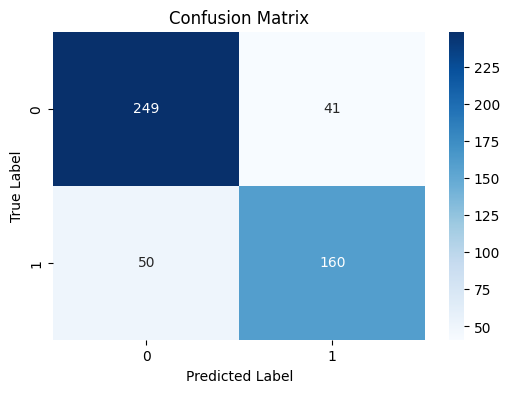

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_validate, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Attribute DataSet.csv")

# Select the columns of interest
columns = ['Style', 'Price', 'Rating', 'Size', 'Season', 'NeckLine', 'SleeveLength',
           'waiseline', 'Material', 'FabricType', 'Decoration', 'Pattern Type']
target = 'Recommendation'

# Preprocessing
X = df[columns]
y = df[target]

# Handle Missing Values
X.fillna(X.mean(), inplace=True)

# Feature Engineering
# Example: Extract the length of the dress from the SleeveLength column
X['DressLength'] = X['SleeveLength'].apply(lambda x: x.split()[0] if isinstance(x, str) else x)

# Example: Combine the Style and Season columns to create a new feature
X['StyleSeason'] = X['Style'] + '_' + X['Season']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Linear Discriminant Analysis (LDA) for feature extraction
lda = LinearDiscriminantAnalysis(n_components=None)  # Keep all components
X_lda = lda.fit_transform(X_scaled, y)

# Base learners: Random Forest, XGBoost, ANN
base_learners = [
    ('random_forest', RandomForestClassifier()),
    ('xgboost', XGBClassifier()),
    ('ann', MLPClassifier())  # Add your ANN model here
]

# Meta-learner: Multi-Layer Perceptron
meta_learner = MLPClassifier()  # You can choose a different meta-learner if desired

# Stacking ensemble
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

# Perform cross-validation with specific k values
k_values = [2, 3, 4, 6]
metrics = ['accuracy', 'precision', 'recall']
cv_results = {}

for metric in metrics:
    cv_results[metric] = []

for k in k_values:
    cv = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_validate(stacking_model, X_lda, y, cv=cv, scoring=metrics)

    for metric in metrics:
        cv_results[metric].append(scores['test_' + metric].mean())

# Train the stacking model
stacking_model.fit(X_lda, y)

# Predictions
y_pred = stacking_model.predict(X_lda)

# Model evaluation
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)
print("Cross-Validation Results:")
for k, metric in zip(k_values, metrics):
    print("K =", k)
    print(metric.capitalize() + ":")
    for fold, score in enumerate(cv_results[metric]):
        print("Fold", fold + 1, ":", score)
    print()

# Generate confusion matrix graph
labels = ['0', '1']  # Replace with your actual class labels
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


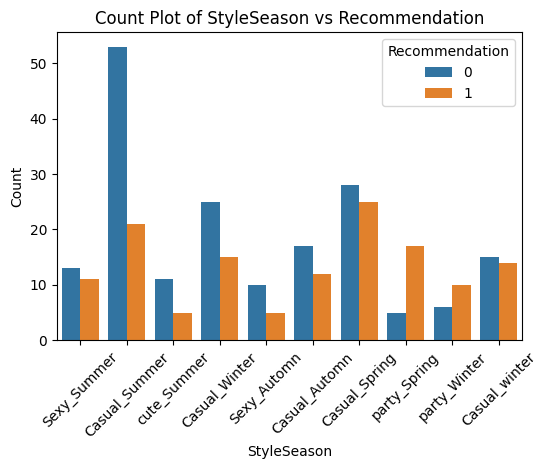

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new feature 'StyleSeason' by combining the 'Style' and 'Season' columns
df['StyleSeason'] = df['Style'] + '_' + df['Season']

# Select a subset of StyleSeason categories to display
subset_styleseason = df['StyleSeason'].value_counts().nlargest(10).index

# Filter the dataframe to include only the selected StyleSeason categories
df_subset = df[df['StyleSeason'].isin(subset_styleseason)]

# Create a count plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df_subset, x='StyleSeason', hue='Recommendation')
plt.title('Count Plot of StyleSeason vs Recommendation')
plt.xlabel('StyleSeason')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [ ]:
# Model evaluation
accuracy = accuracy_score(y, y_pred)
precision_0 = precision_score(y, y_pred, pos_label=0)
precision_1 = precision_score(y, y_pred, pos_label=1)
recall_0 = recall_score(y, y_pred, pos_label=0)
recall_1 = recall_score(y, y_pred, pos_label=1)
conf_matrix = confusion_matrix(y, y_pred)

print("Accuracy:", accuracy)
print("Precision (Class 0):", precision_0)
print("Precision (Class 1):", precision_1)
print("Recall (Class 0):", recall_0)
print("Recall (Class 1):", recall_1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.81
Precision (Class 0): 0.8155339805825242
Precision (Class 1): 0.8010471204188482
Recall (Class 0): 0.8689655172413793
Recall (Class 1): 0.7285714285714285
Confusion Matrix:
[[252  38]
 [ 57 153]]


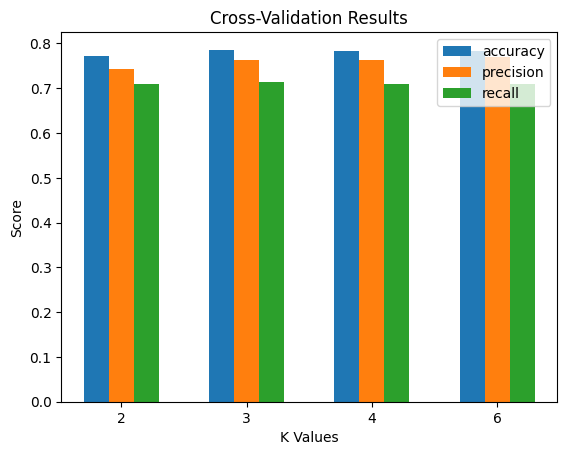

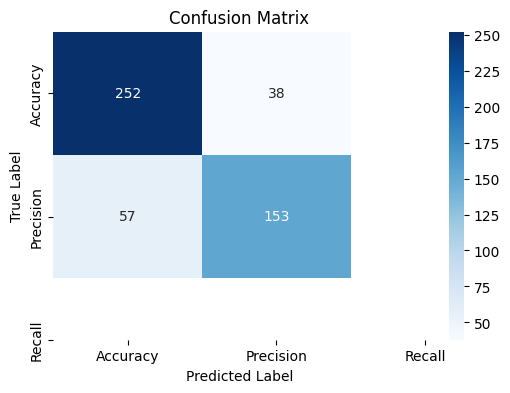

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_validate, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Create a bar plot for each metric
labels = ['Accuracy', 'Precision', 'Recall']
x = np.arange(len(k_values))
width = 0.2

for i, metric in enumerate(metrics):
    plt.bar(x + i * width, cv_results[metric], width=width, label=metric)

plt.xlabel('K Values')
plt.ylabel('Score')
plt.title('Cross-Validation Results')
plt.xticks(x + width, k_values)
plt.legend()
plt.show()

# Generate confusion matrix graph
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


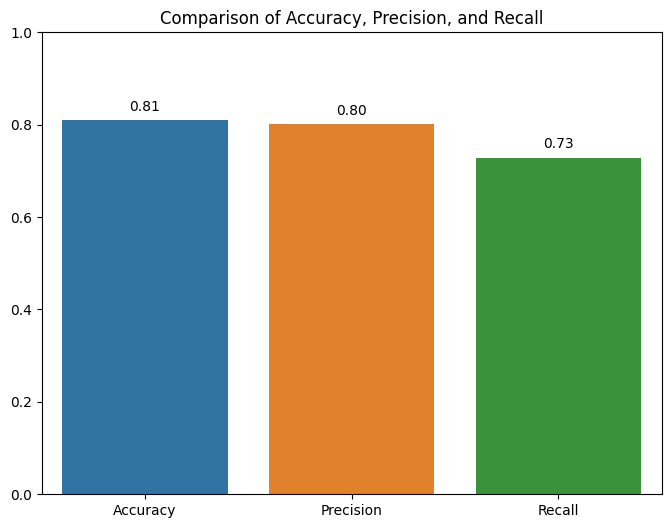

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Generate bar plot for accuracy, precision, and recall
metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, np.mean(precision), np.mean(recall)]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values)
plt.title('Comparison of Accuracy, Precision, and Recall')
plt.ylim([0, 1])

# Add values to the plot
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.2f}', color='black', ha='center')

plt.show()
